In [68]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
! pip install xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Reading the CSV
telecom_df = pd.read_csv("customer_churn.csv")
telecom_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telecom_df.shape

(7043, 21)

In [4]:
telecom_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- The Total charges should be a numeric column but it is showing as object here, we have to fix this.


In [6]:
telecom_df['TotalCharges'] = telecom_df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

- We can clearly see that there is presence of '  ' alongwith the numeric data.


In [7]:
telecom_df[telecom_df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
telecom_df['TotalCharges']=telecom_df['TotalCharges'].replace({' ':np.nan})

In [9]:
telecom_df[telecom_df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [10]:
telecom_df['TotalCharges'] = telecom_df['TotalCharges'].astype(float)

In [11]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
telecom_df['TotalCharges'].isnull().sum()/len(telecom_df)*100

0.1561834445548772

In [13]:
# Imputing the null values with the medain
telecom_df['TotalCharges']=telecom_df['TotalCharges'].fillna(telecom_df['TotalCharges'].median())

In [14]:
telecom_df[telecom_df['TotalCharges']==telecom_df['TotalCharges'].median()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,1397.475,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,1397.475,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,1397.475,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,1397.475,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,1397.475,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,1397.475,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,1397.475,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,1397.475,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,1397.475,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,1397.475,No


In [15]:
telecom_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
telecom_df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2281.916928,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.270398,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


## Unvariate Analysis 

In [17]:
for i in telecom_df.columns:
    print(f'No of Unique values in {i}: {telecom_df[i].nunique()}')
    print()
    print(f'Unique values in {i} are: {telecom_df[i].unique()}')
    print("*******************************************************************************************************")
          

No of Unique values in customerID: 7043

Unique values in customerID are: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
*******************************************************************************************************
No of Unique values in gender: 2

Unique values in gender are: ['Female' 'Male']
*******************************************************************************************************
No of Unique values in SeniorCitizen: 2

Unique values in SeniorCitizen are: [0 1]
*******************************************************************************************************
No of Unique values in Partner: 2

Unique values in Partner are: ['Yes' 'No']
*******************************************************************************************************
No of Unique values in Dependents: 2

Unique values in Dependents are: ['No' 'Yes']
***************************************************************************************************

In [18]:
telecom_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

No     5174
Yes    1869
Name: Churn, dtype: int64


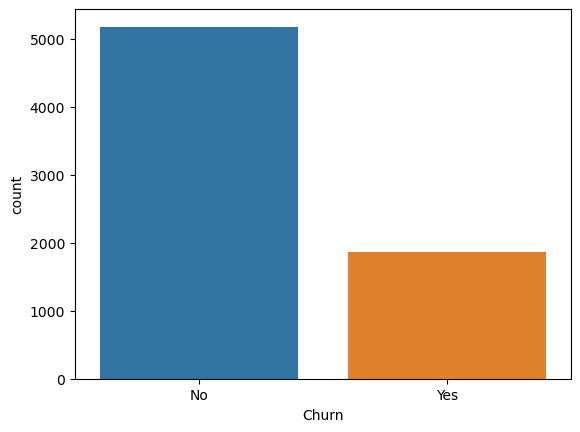

In [19]:
print(telecom_df['Churn'].value_counts())
sns.countplot(x=telecom_df['Churn'],order=telecom_df['Churn'].value_counts().index)
plt.show()

- The graph shows that it is an imbalance dataset.

Male      3555
Female    3488
Name: gender, dtype: int64


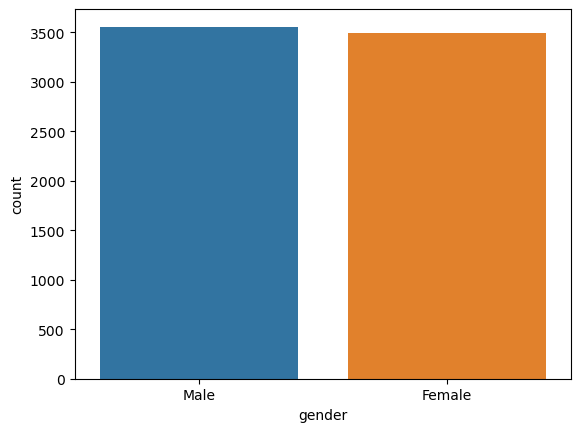

In [20]:
print(telecom_df['gender'].value_counts())
sns.countplot(x=telecom_df['gender'],order=telecom_df['gender'].value_counts().index)
plt.show()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


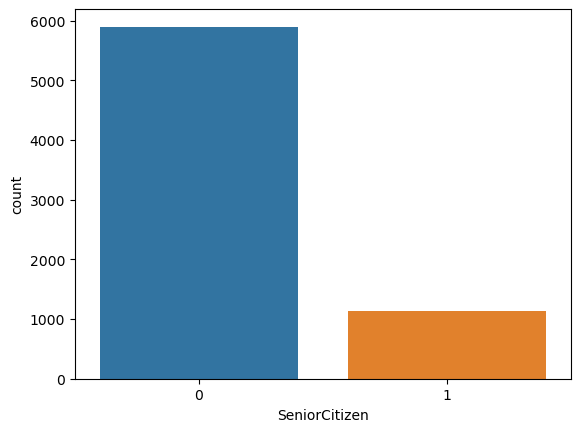

In [21]:
print(telecom_df['SeniorCitizen'].value_counts())
sns.countplot(x=telecom_df['SeniorCitizen'])
plt.show()

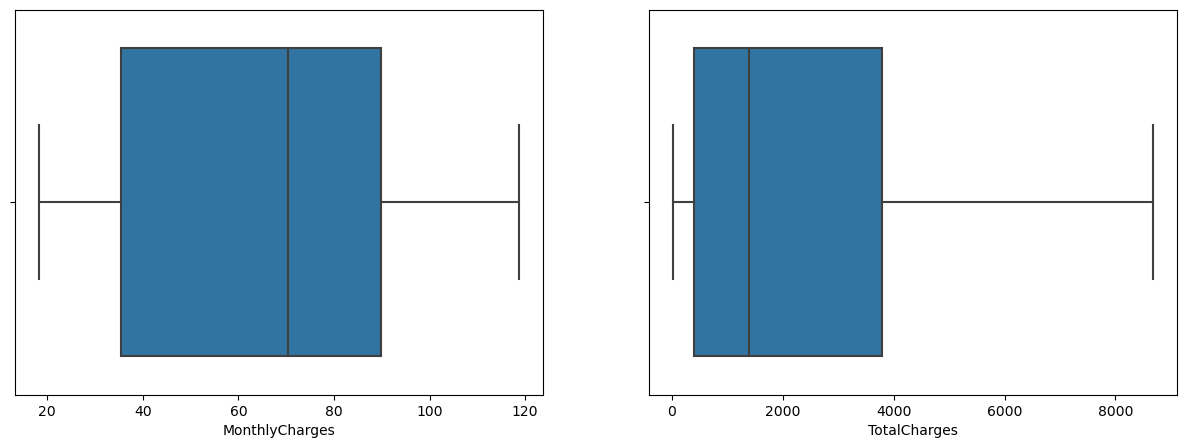

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=telecom_df['MonthlyCharges'])

plt.subplot(1,2,2)
sns.boxplot(x=telecom_df['TotalCharges'])

plt.show()

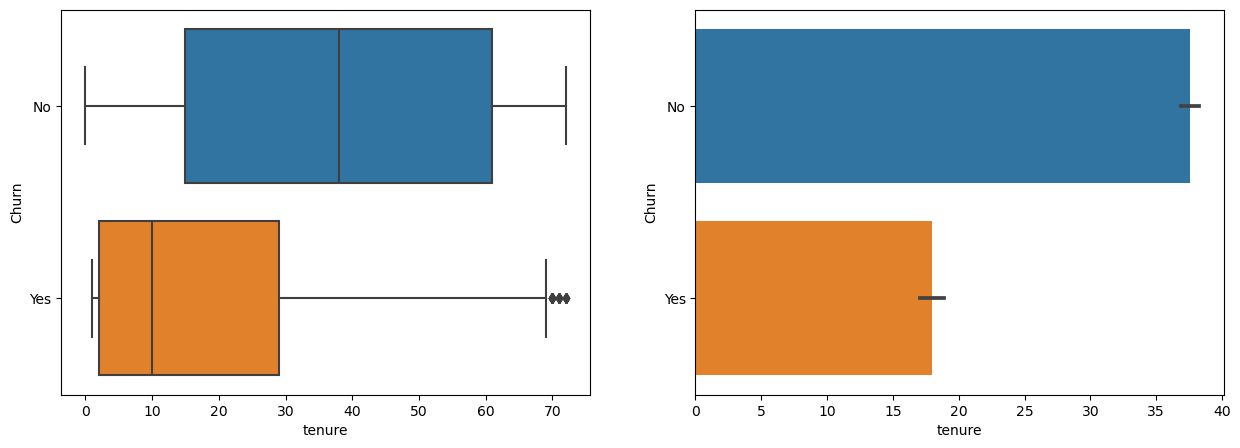

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='tenure',y='Churn',  data=telecom_df)

plt.subplot(1,2,2)
sns.barplot(x='tenure',y='Churn',  data=telecom_df)

plt.show()

- The above graphs shows that the peoples having tenure less than 30 months have the high probability of churning

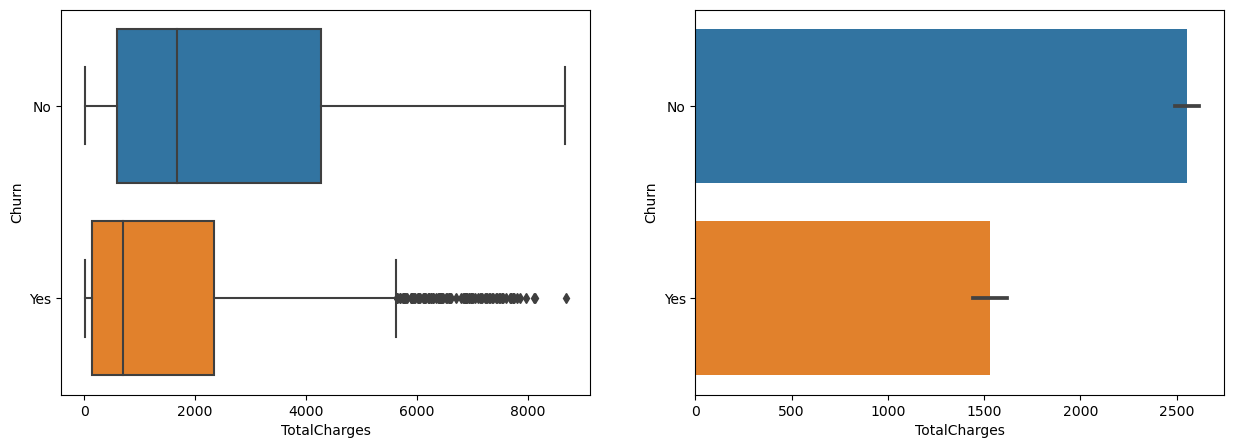

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='TotalCharges',y='Churn',  data=telecom_df)

plt.subplot(1,2,2)
sns.barplot(x='TotalCharges',y='Churn',  data=telecom_df)

plt.show()

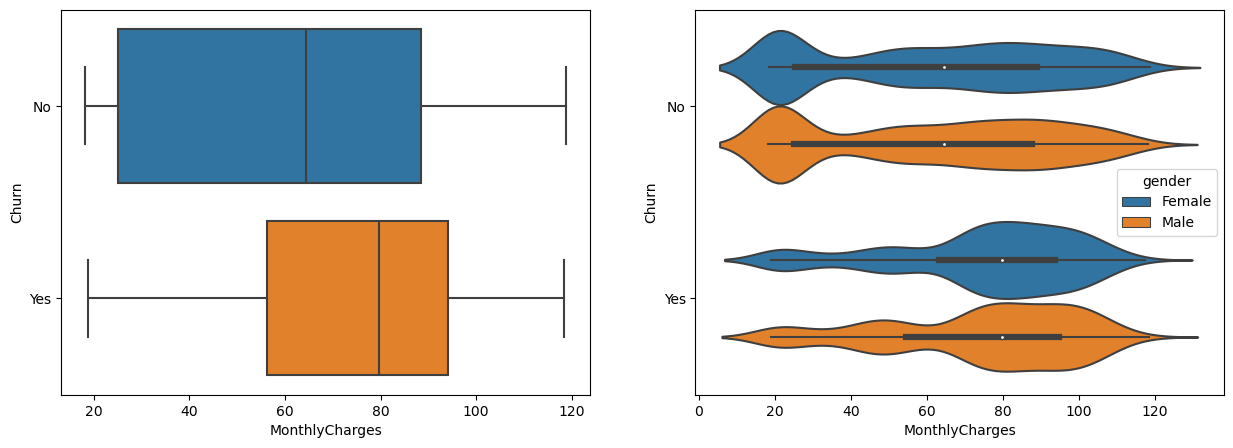

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='MonthlyCharges',y='Churn',data=telecom_df)

plt.subplot(1,2,2)
sns.violinplot(x='MonthlyCharges',y='Churn',hue='gender', data=telecom_df)

plt.show()

In [26]:
telecom_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
def bivariate(col):
    print(f'The Value Counts of {col} is:')
    print(telecom_df[col].value_counts())
    
    sns.countplot(x=col,hue="Churn",data=telecom_df)

The Value Counts of gender is:
Male      3555
Female    3488
Name: gender, dtype: int64
The Value Counts of SeniorCitizen is:
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
The Value Counts of Partner is:
No     3641
Yes    3402
Name: Partner, dtype: int64


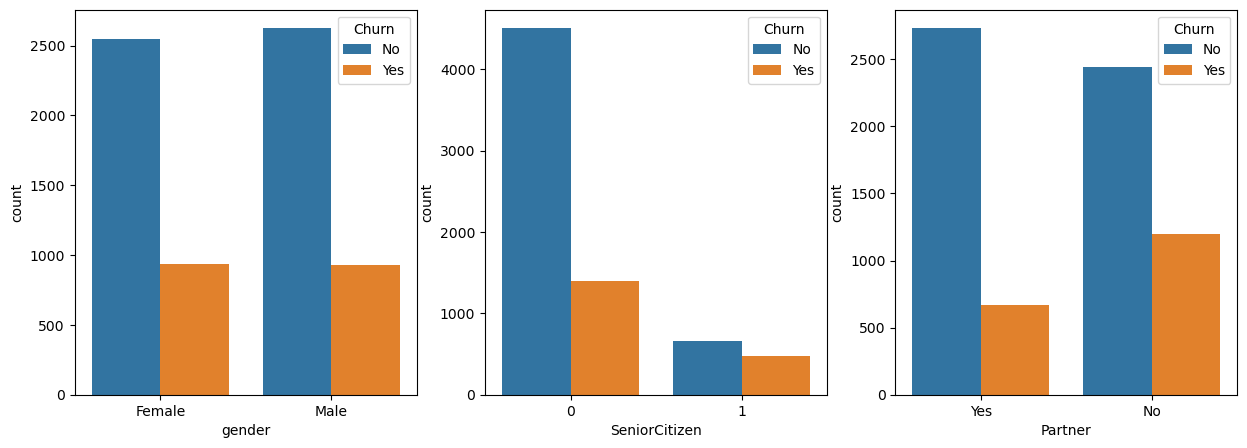

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
bivariate('gender')

plt.subplot(1,3,2)
bivariate('SeniorCitizen')

plt.subplot(1,3,3)
bivariate('Partner')

The Value Counts of Dependents is:
No     4933
Yes    2110
Name: Dependents, dtype: int64
The Value Counts of TechSupport is:
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
The Value Counts of MultipleLines is:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


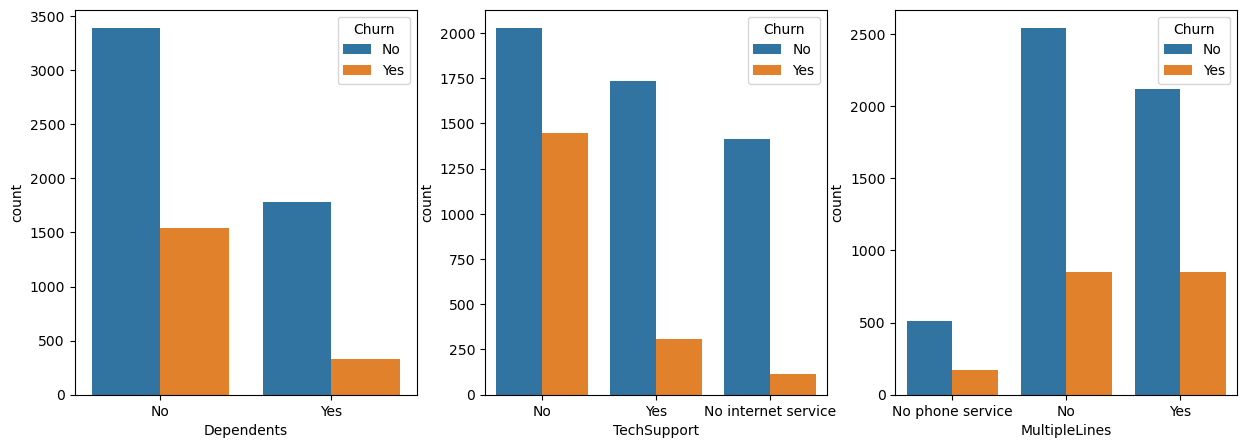

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
bivariate('Dependents')

plt.subplot(1,3,2)
bivariate('TechSupport')

plt.subplot(1,3,3)
bivariate('MultipleLines')

The Value Counts of InternetService is:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
The Value Counts of Contract is:
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
The Value Counts of PaperlessBilling is:
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
The Value Counts of PaymentMethod is:
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


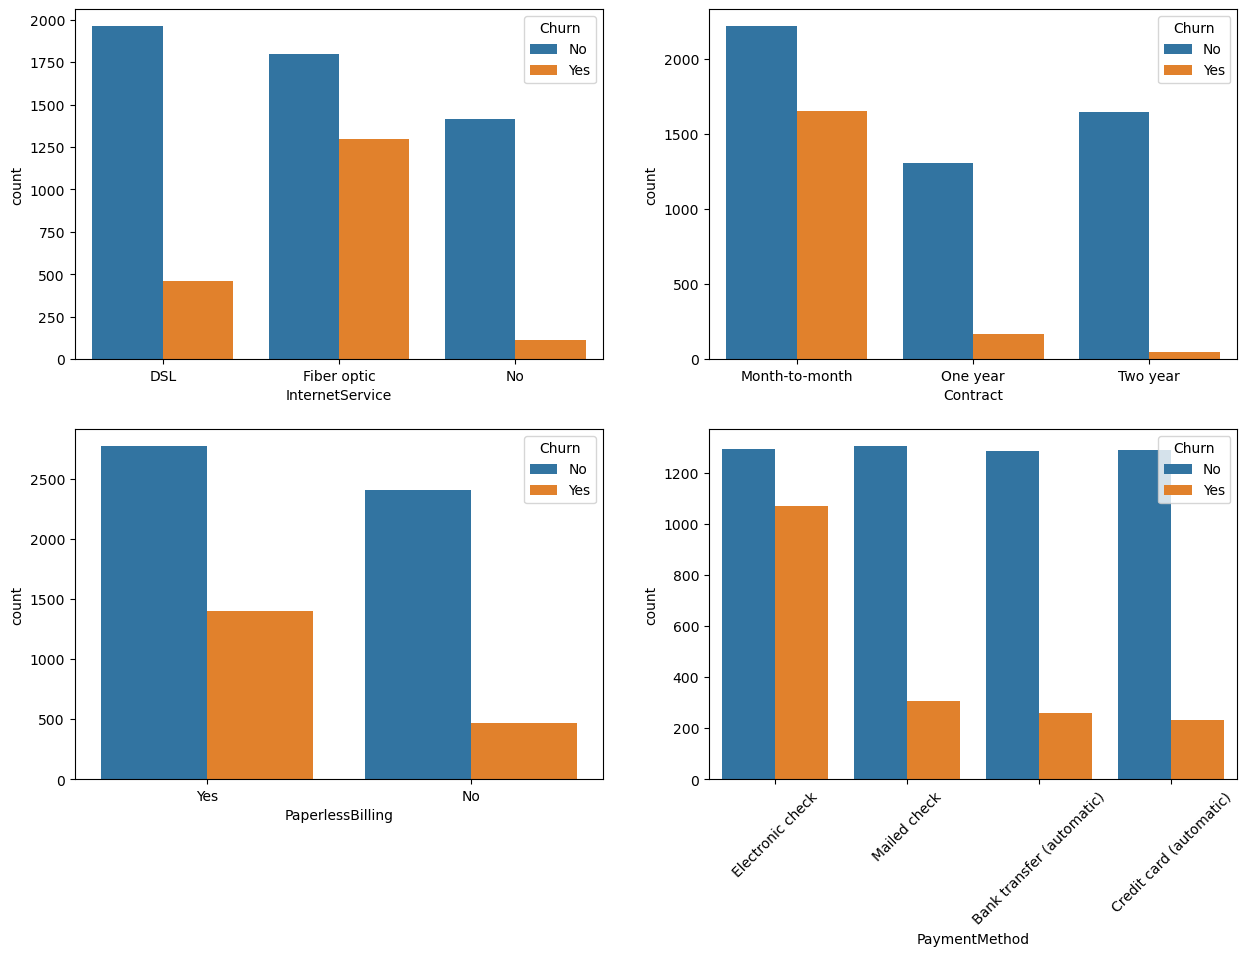

In [30]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
bivariate('InternetService')

plt.subplot(2,2,2)
bivariate('Contract')

plt.subplot(2,2,3)
bivariate('PaperlessBilling')

plt.subplot(2,2,4)
bivariate('PaymentMethod')
plt.xticks(rotation=45)

plt.show()

The Value Counts of OnlineSecurity is:
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
The Value Counts of OnlineBackup is:
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
The Value Counts of DeviceProtection is:
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


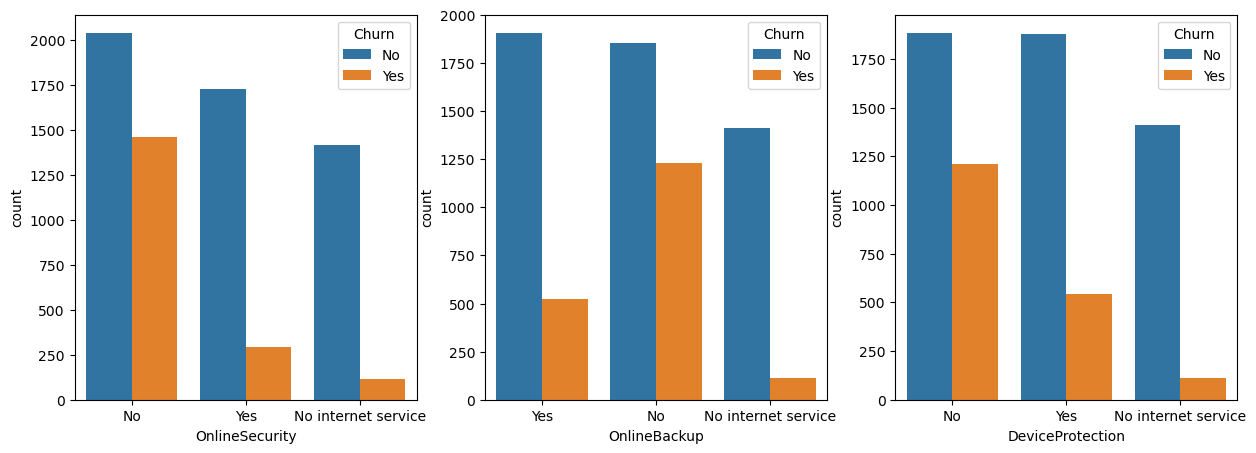

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
bivariate('OnlineSecurity')

plt.subplot(1,3,2)
bivariate('OnlineBackup')

plt.subplot(1,3,3)
bivariate('DeviceProtection')

The Value Counts of StreamingTV is:
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
The Value Counts of StreamingMovies is:
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


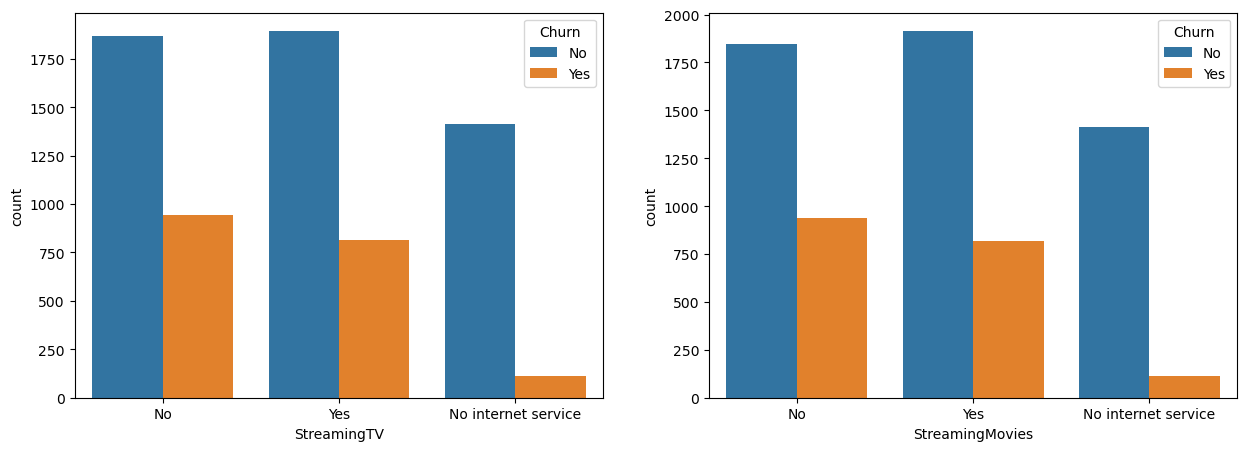

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
bivariate('StreamingTV')

plt.subplot(1,2,2)
bivariate('StreamingMovies')

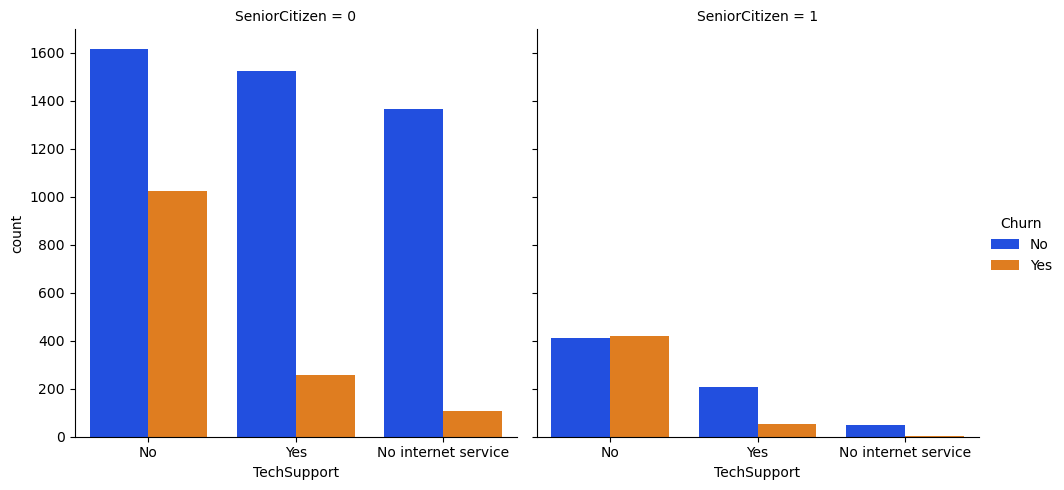

In [33]:
sns.catplot(data=telecom_df,x='TechSupport',col='SeniorCitizen',hue='Churn',palette='bright',kind='count')

plt.show()

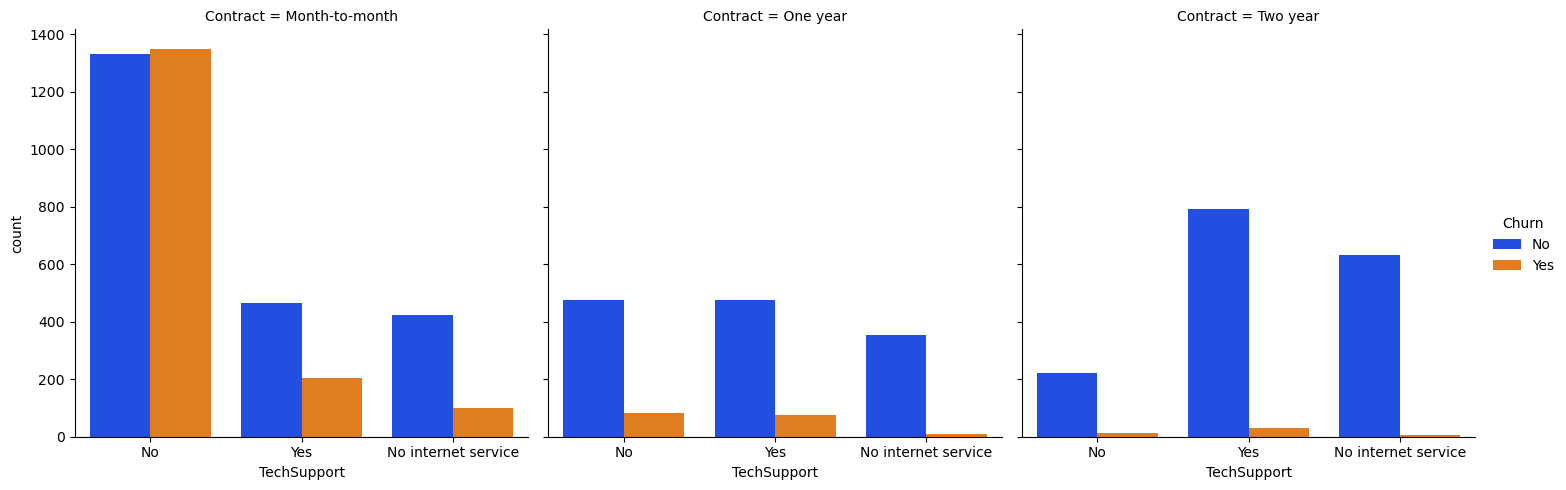

In [34]:
sns.catplot(data=telecom_df,x='TechSupport',col='Contract',hue='Churn',palette='bright',kind='count')

## Data PreProcessing

In [35]:
tel_new=telecom_df.copy()
tel_new.drop(["customerID"], axis=1,inplace=True)

In [36]:
tel_new.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [37]:
tel_new["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [38]:
tel_new["Churn"]= tel_new["Churn"].replace({'Yes':1,'No':0})
tel_new["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [39]:
# Encoding
tel_new = pd.get_dummies(tel_new, columns=['gender','Partner','Dependents','PhoneService','MultipleLines',
                                           'InternetService','OnlineSecurity','OnlineBackup',
                                           'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
                                           'PaperlessBilling','PaymentMethod'],
                         drop_first=True)

In [40]:
tel_new.shape

(7043, 31)

In [41]:
tel_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   uint8  
 6   Partner_Yes                            7043 non-null   uint8  
 7   Dependents_Yes                         7043 non-null   uint8  
 8   PhoneService_Yes                       7043 non-null   uint8  
 9   MultipleLines_No phone service         7043 non-null   uint8  
 10  MultipleLines_Yes                      7043 non-null   uint8  
 11  Inte

In [42]:
tel_new.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370,0.504756,0.483033,0.299588,0.903166,0.096834,...,0.216669,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880
std,0.368612,24.559481,30.090047,2265.270398,0.441561,0.500013,0.499748,0.458110,0.295752,0.295752,...,0.412004,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
# feature Scaling
sc=StandardScaler()
tel_new[['tenure','MonthlyCharges','TotalCharges']]=sc.fit_transform(tel_new[['tenure','MonthlyCharges','TotalCharges']])

In [44]:
tel_new.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,-2.421273e-17,-6.406285e-17,-1.488074e-17,0.265370,0.504756,0.483033,0.299588,0.903166,0.096834,...,0.216669,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880
std,0.368612,1.000071e+00,1.000071e+00,1.000071e+00,0.441561,0.500013,0.499748,0.458110,0.295752,0.295752,...,0.412004,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141
min,0.000000,-1.318165e+00,-1.545860e+00,-9.991203e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-9.516817e-01,-9.725399e-01,-8.298459e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.372744e-01,1.857327e-01,-3.904632e-01,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,9.214551e-01,8.338335e-01,6.642871e-01,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.613701e+00,1.794352e+00,2.826743e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Spliting the dataset

In [45]:
x=tel_new.drop(columns=['Churn'],axis=1)
y=tel_new[['Churn']]

In [46]:
x.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.173244,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [47]:
y.head(2)

,Churn
0,0
1,0


In [48]:
y.value_counts()

Churn
0        5174
1        1869
dtype: int64

In [49]:
# Balancing the dataset 
from imblearn.over_sampling import SMOTE

In [50]:
smote=SMOTE()
x_smote, y_smote=smote.fit_resample(x,y)

In [51]:
y_smote.value_counts()

Churn
0        5174
1        5174
dtype: int64

## Splitting into Train And Test

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size=0.2, random_state=53)

In [53]:
x_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2779,0,-0.951682,0.684272,-0.672514,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
9837,0,-1.249570,-0.327852,-0.965845,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
9462,0,0.214934,1.174628,0.687399,0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
5056,0,1.613701,0.662668,1.594617,0,1,1,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2792,0,-0.707359,-0.528840,-0.682138,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,0,1.450820,0.672639,1.468288,0,1,1,1,0,0,...,0,1,0,1,0,1,1,1,0,0
6565,0,1.165777,1.377241,1.807102,1,1,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
2933,0,1.450820,-1.354753,-0.272665,1,1,1,1,0,1,...,1,0,1,0,0,1,1,0,0,0
8989,0,0.600180,1.150399,1.092233,1,1,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0


## Random Forest Model

In [54]:
rf=RandomForestClassifier(oob_score=True)

In [55]:
rf.fit(x_train,y_train)

C:\Users\mkanc\AppData\Local\Temp\ipykernel_19900\1149647727.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier(oob_score=True)

In [56]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

In [57]:
y_pred_train

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [58]:
y_pred_test

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [59]:
# Model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

In [60]:
print("Confusion Matrix for Training Data")
print (confusion_matrix(y_train,y_pred_train))
print()
print("Confusion Matrix for Testing Data")
print(confusion_matrix(y_test,y_pred_test))

Confusion Matrix for Training Data
[[4150    9]
 [   4 4115]]

Confusion Matrix for Testing Data
[[834 181]
 [129 926]]


In [61]:
print("classification_report for Training Data")
print (classification_report(y_train,y_pred_train))
print()
print("classification_report for Testing Data")
print(classification_report(y_test,y_pred_test))

classification_report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4159
           1       1.00      1.00      1.00      4119

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278


classification_report for Testing Data
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1015
           1       0.84      0.88      0.86      1055

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



## Training And Testing Accuracy

In [65]:
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print()
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.9984295723604736

Testing Accuracy: 0.8502415458937198


In [69]:
# Cross Validation
training_accuracy=cross_val_score(rf,x_train,y_train,cv=10)
print("Training Accuracies:", training_accuracy)
print()
print("Mean Training Accuracy:", training_accuracy.mean())
print()
print("Maxmimum Training Accuracy:", training_accuracy.max())


Training Accuracies: [0.81642512 0.83574879 0.84299517 0.83574879 0.81521739 0.85507246
 0.82971014 0.84299517 0.84280532 0.85247884]

Mean Training Accuracy: 0.8369197203091321

Maxmimum Training Accuracy: 0.855072463768116


## XG Boost Classifier

In [70]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
y_pred_train=xgb.predict(x_train)
y_pred_test=xgb.predict(x_test)

In [72]:
print("Confusion Matrix for Training Data")
print (confusion_matrix(y_train,y_pred_train))
print()
print("Confusion Matrix for Testing Data")
print(confusion_matrix(y_test,y_pred_test))

Confusion Matrix for Training Data
[[3825  334]
 [ 120 3999]]

Confusion Matrix for Testing Data
[[820 195]
 [160 895]]


In [73]:
print("classification_report for Training Data")
print (classification_report(y_train,y_pred_train))
print()
print("classification_report for Testing Data")
print(classification_report(y_test,y_pred_test))

classification_report for Training Data
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      4159
           1       0.92      0.97      0.95      4119

    accuracy                           0.95      8278
   macro avg       0.95      0.95      0.95      8278
weighted avg       0.95      0.95      0.95      8278


classification_report for Testing Data
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1015
           1       0.82      0.85      0.83      1055

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



## Training And Testing Accuracy

In [74]:
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print()
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.9451558347426915

Testing Accuracy: 0.8285024154589372


In [76]:
# Cross Validation
training_accuracy=cross_val_score(xgb,x_train,y_train,cv=10)
print("Training Accuracies:", training_accuracy)
print()
print("Mean Training Accuracy:", training_accuracy.mean())
print()
print("Maxmimum Training Accuracy:", training_accuracy.max())


Training Accuracies: [0.8031401  0.83816425 0.82125604 0.82971014 0.81280193 0.83937198
 0.84178744 0.83091787 0.81741233 0.84038694]

Mean Training Accuracy: 0.8274949032940201

Maxmimum Training Accuracy: 0.8417874396135265
